In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


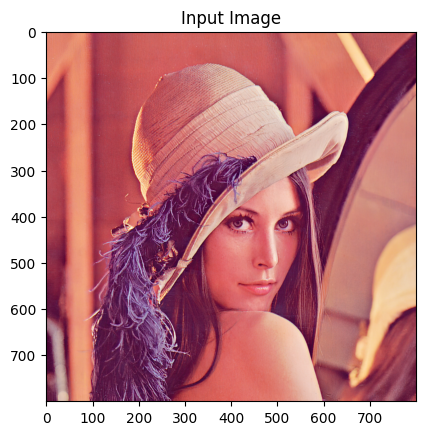

In [3]:
# (1) Load Image
image = mpimg.imread("Lenna.png")

# Show original image
plt.imshow(image)
plt.title('Input Image')
plt.show()

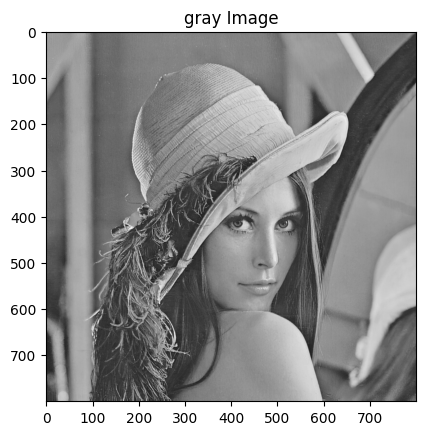

In [4]:
#(2) Convert to grayscale
image = image.mean(axis=-1)

# Show gray image
plt.imshow(image, cmap="gray")
plt.title('gray Image')
plt.show()

In [5]:
# (3) Perform Gaussian smoothing
#Create an all-zero array with the same shape as the image to store the results of the subsequent processing.
new_image = np.zeros(image.shape)

for i in range(1, len(image)-1):
    for j in range(1, len(image[0])-1):
        new_image[i][j] = image[i-1:i+2, j-1:j+2].mean()

image = new_image


"""
This code implements a Gaussian smoothing operation. Specifically, it processes each pixel of the image to blur the image by taking the average of the 3x3 region around it.

The specific steps are as follows:

Iterate through the pixels of the image using a nested loop.
For each pixel (i, j), select the 3x3 region around it i.e. pixels from i-1 to i+1 rows and from j-1 to j+1 columns.
An average is computed over the selected region and the result is assigned to new_image[i][j].
This has the effect of smoothing the image to minimize noise and details, making subsequent edge detection operations more accurate.
"""

In [6]:
# (4) gradient angle

gradient_x = np.zeros(image.shape)
gradient_y = np.zeros(image.shape)

for i in range(1, len(image)-1):
    for j in range(1, len(image[0])-1):
        gradient_x[i, j] = image[i+1, j] - image[i-1, j]
        gradient_y[i, j] = image[i, j+1] - image[i, j-1]



"""
This code is used to calculate the gradient direction and convert it to an angular representation.
The specific operation is as follows:
new_grad = np.arctan2(gradient_y, gradient_x): Calculates the gradient direction for each pixel point using the np.arctan2 function.
gradient_y contains the gradient value in the y-direction, and gradient_x contains the gradient value in the x-direction.
np.arctan2 returns the result in angle in radians.
new_grad = new_grad * 180. / np.pi: Converts radians to angles by multiplying by 180 and dividing by pi.
new_grad[new_grad < 0] += 180: For all angles less than 0, add 180 degrees to make sure all angles are between 0 and 180 degrees.
In this way, new_grad contains the gradient direction for each pixel point, expressed as an angle value between 0 and 180 degrees.
This will be used in subsequent steps to determine the orientation of the edges.

"""

In [7]:
# （5） Gradient Direction Discretization：
new_grad = np.arctan2(gradient_y, gradient_x)  #Calculates the gradient direction and converts it to an angular representation.
new_grad = new_grad * 180. / np.pi      #Convert radians to angles by multiplying by 180 and dividing by π
new_grad[new_grad < 0] += 180

"""
This code implements a non-maximum suppression step for refining the detected edges.

This is done as follows:

For each pixel (i, j), first initialize q and r to 255 (which is a boundary value).

Depending on the direction of the gradient new_grad[i,j], it is processed in four cases:

If the direction is between 0 and 22.5 degrees, or between 157.5 and 180 degrees,
then q takes the value of the pixel to the right of the current pixel, and r takes the value of the pixel in the upper left corner of the current pixel.
If the orientation is between 22.5 and 67.5 degrees, then q takes the value of the pixel to the left of the current pixel,
and r takes the value of the pixel to the right of the current pixel.
If the orientation is between 67.5 and 112.5 degrees, then q takes the value of the pixel below the current pixel and r takes the value of the pixel above the current pixel.
If the direction is between 112.5 and 157.5 degrees, then the value of q is the value of the pixel in the lower left corner of the current pixel and the value of r is the value of the pixel in the upper right corner of the current pixel.
Based on the values of q and r, determine whether the current pixel is a local gradient maximum. If it is, then the value of the current pixel is retained, otherwise it is set to zero.

In this way the pixel with the maximum local gradient in the image is retained and the other pixels are suppressed to 0, resulting in a refined edge image.

"""

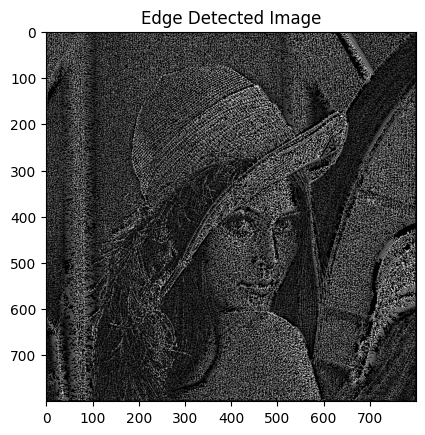

In [8]:
#（6）Non-Maximum Suppression
for i in range(1, len(image)-1):         #A non-maximum suppression step is implemented for refining the detected edges
    for j in range(1, len(image[0])-1):
        q = 255
        r = 255

        if (0 <= new_grad[i,j] < 22.5) or (157.5 <= new_grad[i,j] <=180):
            q = image[i, j+1]
            r = image[i-1, j-1]
        elif (22.5 <= new_grad[i,j] < 67.5):
            q = image[i+1, j-1]
            r = image[i-1, j+1]
        elif (67.5 <= new_grad[i,j] < 112.5):
            q = image[i+1, j]
            r = image[i-1, j]
        elif (112.5 <= new_grad[i,j] < 157.5):
            q = image[i-1, j-1]
            r = image[i+1, j+1]

        if (image[i,j] >= q) and (image[i,j] >= r):
            new_image[i,j] = image[i,j]
        else:
            new_image[i,j] = 0

image = new_image

# Show
plt.imshow(image, cmap="gray")
plt.title('Edge Detected Image')
plt.show()

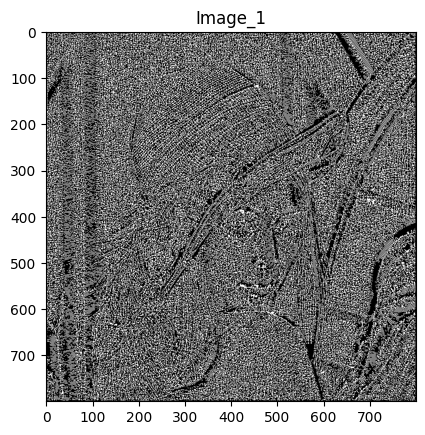

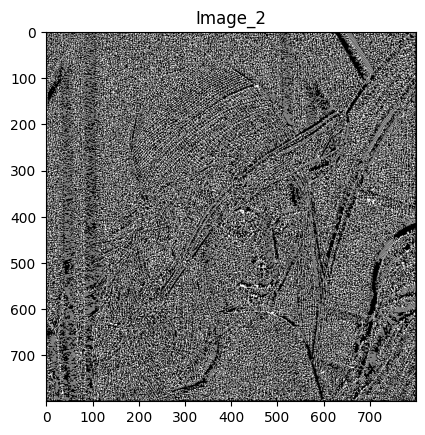

In [9]:
# (7) dual-threshold
image_1 = np.where(image > np.max(image)*0.2, 230, image)
image_2 = np.where(image < np.max(image)*0.05, 0, 25)
plt.imshow(image_1, cmap="gray")
plt.title('Image_1')
plt.show()

plt.imshow(image_2, cmap="gray")
plt.title('Image_2')
plt.show()


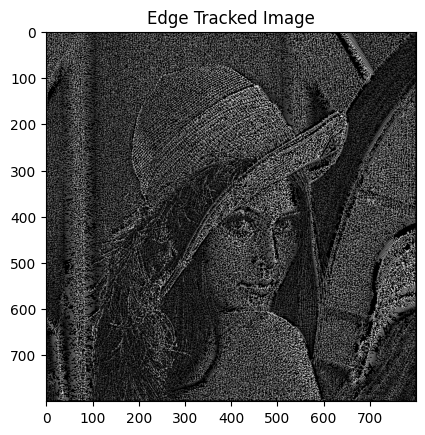

In [10]:
#(8) edge tracking by hysteresis
new_image = np.zeros(image.shape)

for i in range(1, len(image)-1):
    for j in range(1, len(image[0])-1):
      if np.max(image[i-1:i+2,j-1:j+2]) == 255:
        new_image[i][j] = 255
      else:
        new_image[i][j] = 0


plt.imshow(image, cmap="gray")
plt.title('Edge Tracked Image')
plt.show()